# Step 1. Importing Libraries & Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil import parser
import time

In [2]:
dataset = pd.read_csv('C:\\Users\\gyumin1009\\Desktop\\Projects\\raw_data\\Customers__App_Behavior\\FineTech_appData.csv')
top_screens = pd.read_csv('C:\\Users\\gyumin1009\\Desktop\\Projects\\raw_data\\Customers__App_Behavior\\top_screens.csv')

# Step 2. EDA 

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [6]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])

In [7]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Step 2.2 Visualizing Data 

<Figure size 432x288 with 0 Axes>

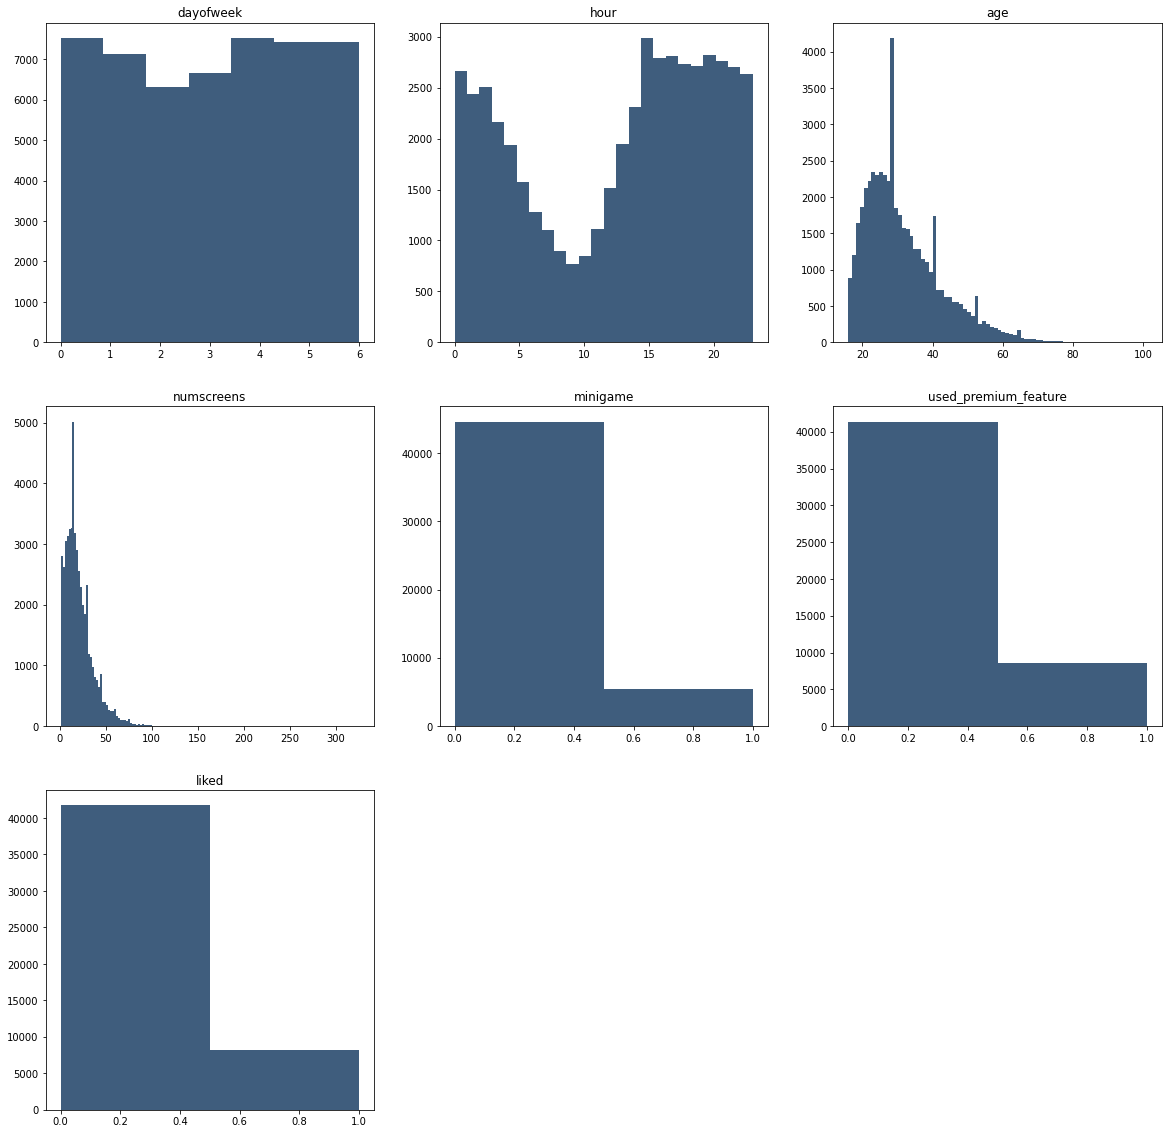

In [8]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
plt.figure(figsize = (20,20))
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D');

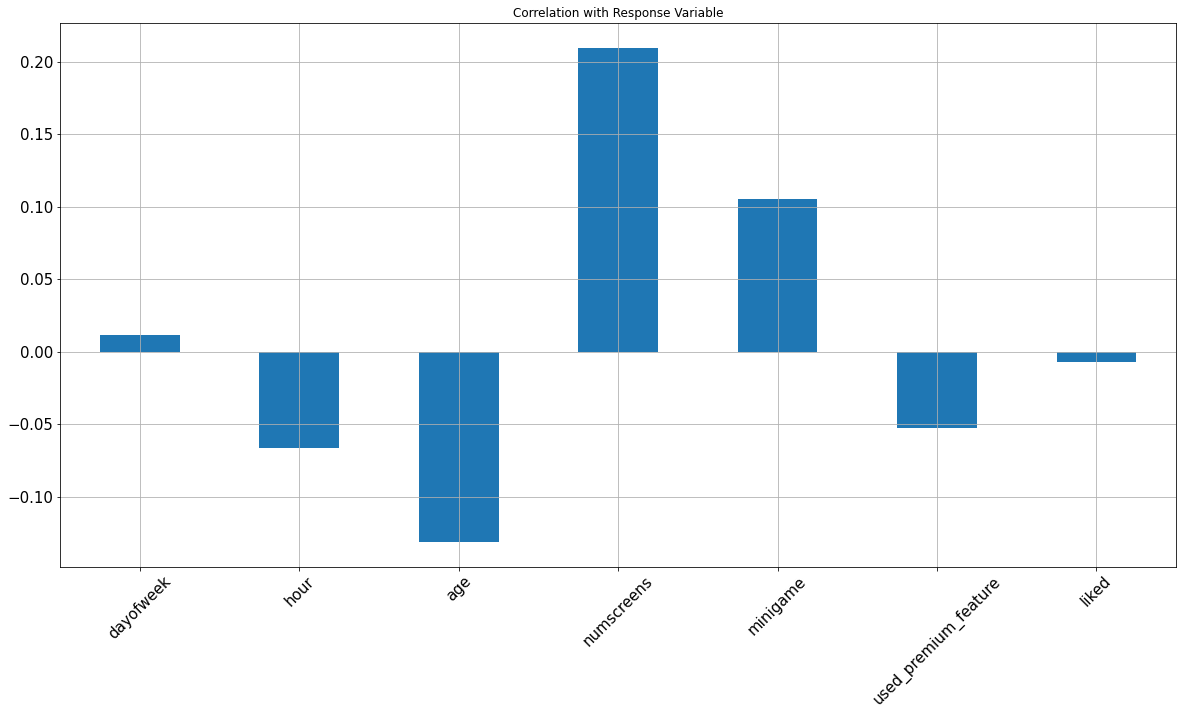

In [9]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                             title = 'Correlation with Response Variable',
                                             fontsize = 15,
                                             rot = 45, # x축이 45도 돌아간다.
                                             grid = True # 격자 추가
                                             );

## Step 2.3 Correlation Matrix for Avoiding Multicollinearity

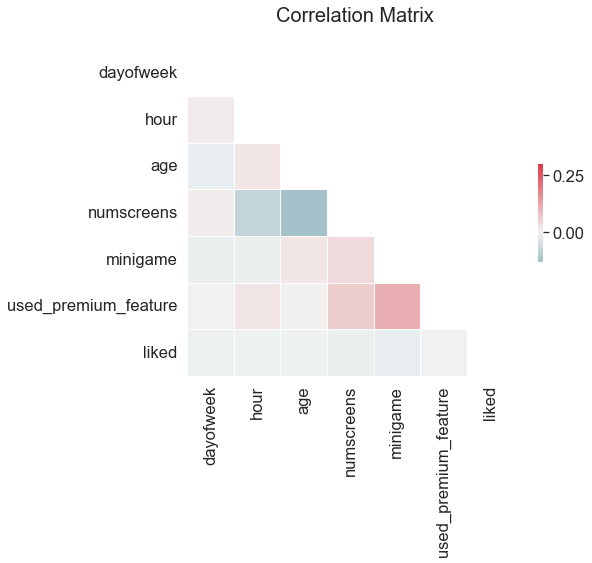

In [10]:
sns.set(style='white', font_scale = 1.5)
corr = dataset2.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True # 상관관계 그래프는 대칭적임으로 한 쪽만 보여준다.

f, ax = plt.subplots(figsize = (9,6))
f.suptitle('Correlation Matrix', fontsize = 20)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = 0.3, center = 0,
           square = True, linewidths = 0.5, cbar_kws={"shrink":0.3});

In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

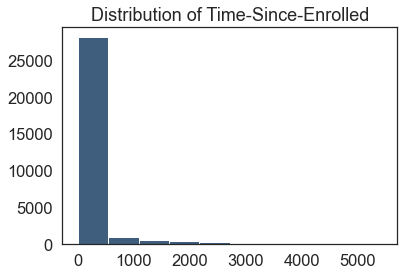

In [13]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled');

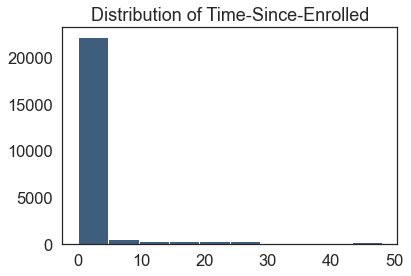

In [14]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0,48])
plt.title('Distribution of Time-Since-Enrolled');

In [15]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [16]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [17]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [18]:
top_screens_data = top_screens.top_screens.values
top_screens_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [19]:
dataset['screen_list'] = dataset['screen_list'].astype(str) + ','

In [20]:
for sc in top_screens_data:
    dataset[sc] = dataset['screen_list'].str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')
    
dataset["Other"] = dataset.screen_list.str.count(',')

In [21]:
dataset = dataset.drop(columns = ['screen_list'])

## Funnels 

### 상관관계가 있는 screen_list들을 하나의 screen으로 합침 

In [22]:
saving_screens=['Saving1',
                'Saving2',
                'Saving2Amount',
                'Saving4',
                'Saving5',
                'Saving6',
                'Saving7',
                'Saving8',
                'Saving9',
                'Saving10'
               ]
dataset['SavingsCount']=dataset[saving_screens].sum(axis=1)
dataset = dataset.drop(columns= saving_screens)

In [23]:
credit_screens=['Credit1',
                'Credit2',
                'Credit3',
                'Credit3Container',
                'Credit3Dashboard',
               ]
dataset['credit_screens_count']=dataset[credit_screens].sum(axis=1)
dataset.drop(columns=credit_screens,axis=1,inplace=True)

In [24]:
cc_screens=['CC1',
           'CC1Category',
           'CC3',
           ]
dataset['cc_screens_count']=dataset[cc_screens].sum(axis=1)
dataset.drop(columns=cc_screens,inplace=True)

In [25]:
loan_screens=['Loan',
             'Loan2',
             'Loan3',
             'Loan4',
             ]
dataset['loan_screens_count']=dataset[loan_screens].sum(axis=1)
dataset.drop(columns=loan_screens,inplace=True)

In [26]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [27]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [28]:
dataset.to_csv("new_appdata.csv", index = False)

# Step 4. Creating a Model 

In [29]:
dataset = pd.read_csv('new_appdata.csv')

In [30]:
dataset.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [31]:
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=1)

In [34]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

## 4.1 Feature Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [37]:
X_train = X_train2
X_test = X_test2

In [38]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,credit_screens_count,cc_screens_count,loan_screens_count
18165,1.461526,-1.553887,-0.809274,-0.326778,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,-1.050367,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,4.683504,-0.762013,-0.288394,-1.166293
36059,-1.491325,0.863914,-0.346435,-0.071547,-0.347870,-0.457413,-0.445576,0.96651,1.549446,0.952048,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,0.311711
13242,0.969384,0.863914,-0.624139,-0.071547,-0.347870,-0.457413,-0.445576,-1.03465,-0.645392,0.952048,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.758520,-0.262230,1.706311,-0.288394,0.311711
32985,-0.999183,-0.344987,1.690057,-0.582008,-0.347870,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,-0.262230,1.706311,1.340722,-1.166293
41133,0.969384,0.057980,-0.716706,1.140796,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,0.952048,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.577022,-0.262230,0.060762,-0.288394,0.311711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.477242,0.729592,-0.253867,-0.709623,2.874639,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.059983,-0.262230,-0.762013,-0.288394,0.311711
32511,-0.999183,0.326625,0.579243,-0.582008,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,0.952048,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.059983,-0.262230,-0.762013,-0.288394,-1.166293
5192,-0.507041,1.132558,0.116404,0.438913,-0.347870,-0.457413,2.244287,0.96651,-0.645392,-1.050367,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,2.563904,1.706311,-0.288394,-1.166293
12172,0.969384,0.729592,1.782625,-0.071547,-0.347870,-0.457413,2.244287,-1.03465,1.549446,-1.050367,...,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.212852,-0.262230,0.060762,-0.288394,0.311711


## 4.2 Model Building 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression(random_state=1, C=1, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [42]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

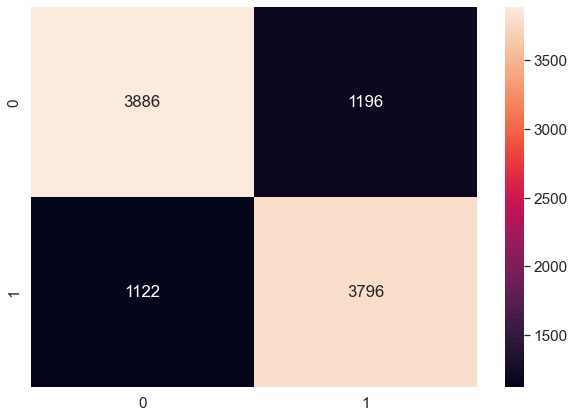

In [45]:
cm_df = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm_df, annot=True, fmt='g');

## 4.3 K-Fold Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
accuracies = cross_val_score(estimator= classifier, X = X_train, y = y_train, cv = 10)

In [50]:
print("Logistic Accuracy: %0.3f (+/- %0.3f)"%(accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.767 (+/- 0.012)


# Step 5. Formatting the Final Results 

In [53]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results = final_results[['user','enrolled','predicted_results']].reset_index(drop = True)
final_results

,user,enrolled,predicted_results
0,356839,1,1
1,50476,1,1
2,139338,0,0
3,21025,1,1
4,53743,0,1
...,...,...,...
9995,168496,0,0
9996,283746,1,1
9997,327980,0,0
9998,104563,1,0
